In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ 

In [2]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

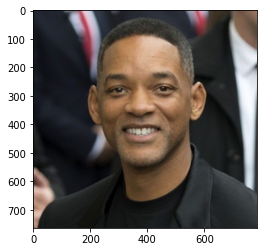

In [4]:
image = '/content/drive/MyDrive/aiffelcsv/·Ñã·Ö±·ÜØ·Ñâ·Ö≥·ÑÜ·Öµ·Ñâ·Ö≥.png'
img_bgr = cv2.imread(image) # openCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨Ïò®Îã§
img_show = img_bgr.copy() # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥Ä
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

opencvÎäî ÏòàÏô∏Ï†ÅÏúºÎ°ú BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. ÏõêÎ≥∏ ÏÇ¨ÏßÑÏóêÏÑú Î∂âÏùÄÏÉâÏùÄ Ìë∏Î•∏ÏÉâÏúºÎ°ú, Ìë∏Î•∏ÏÉâÏùÄ Î∂âÏùÄÏÉâÏúºÎ°ú Î∞îÎÄåÏñ¥ Ï∂úÎ†•Îêú Í≤ÉÏûÖÎãàÎã§. Í∑∏ÎûòÏÑú, opencvÏóêÏÑú Îã§Î£¨ Ïù¥ÎØ∏ÏßÄÎ•º Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©ÌïòÏó¨ Ï∂úÎ†•ÌïòÎ†§Î©¥ ÏúÑÏôÄ Í∞ôÏùÄ ÏÉâÍπî Î≥¥Ï†ïÏ≤òÎ¶¨Î•º Ìï¥Ï£ºÍ≤å Îê©ÎãàÎã§.

# ÏñºÍµ¥ Í≤ÄÏ∂ú & ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂úÌïòÍ∏∞

In [5]:
detector_hog = dlib.get_frontal_face_detector() # dlibÏùÑ ÌôúÏö©Ìï¥ hog detector ÏÑ†Ïñ∏
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 2) #(image , num of image pyramid)

rectangles[[(213, 176) (545, 509)]]


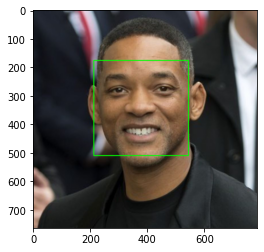

In [6]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
#  Ï†ÄÏû•Ìïú ÎûúÎìúÎßàÌÅ¨ Î∂àÎü¨Ïò§Í∏∞
model_path = '/content/drive/MyDrive/aiffelcsv/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§.
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_points Îäî 68Í∞úÎ°ú Ïù¥Î£®Ï†Ñ Î¶¨Ïä§Ìä∏Í∞Ä ÎêúÎã§
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
# list_landmarkÏóê 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Í∞Ä ÏñºÍµ¥ Í∞úÏàòÎßåÌÅº Ï†ÄÏû•

68


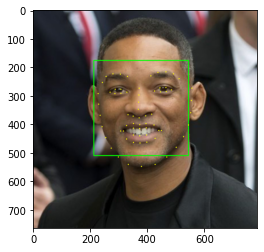

In [8]:
#ÎûúÎìúÎßàÌÅ¨ ÏòÅÏÉÅÏ∂úÎ†•
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))


(369, 347)
(x,y) : (369,180)
(w,h) : (333,333)


(333, 333, 3)


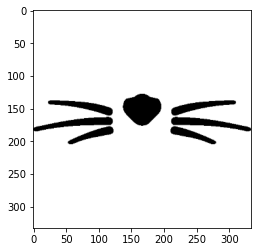

In [10]:
sticker_path = '/content/drive/MyDrive/aiffelcsv/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

# Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÏúÑÏπò ÌôïÏù∏ÌïòÍ∏∞

In [11]:
# ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÍ∞ÄÌïòÍ∏∞ÏúÑÌï¥ x,yÏ¢åÌëú Ï°∞Ï†ï
refined_x = x - w // 2
refined_y = y
print ('x,y): (%d,%d)'%(refined_x, refined_y))


x,y): (203,180)


In [12]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(333, 333, 3)
(x,y) : (203,180)


cv2.addWeighted(src1, alpha, src2, beta ,gamma, dst=None,dytpe=None) 

- src1:(ÏûÖÎ†•) Ï≤´Î≤àÏû¨ ÏòÅÏÉÅ
- alpha : Ï≤´ Î≤àÏû¨ ÏòÅÏÉÅ Í∞ÄÏ§ëÏπò
- src2: Îëê Î≤àÏß∏ ÏòÅÏÉÅ. src1Í≥º Í∞ôÏùÄÌÅ¨Í∏∞ & Í∞ôÏùÄ ÌÉÄÏûÖ
- beta : ÎëêÎ≤àÏß∏ ÏòÅÏÉÅ Í∞ÄÏ§ëÏπò
- gamma : Í≤∞Í≥ºÏòÅÏÉÅÏóê Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÎçîÌï†Í∞í
- dst : Í∞ÄÏ§ëÏπò Ìï© Í≤∞Í≥º ÏòÅÏÉÅ
- dtype : Ï∂úÎ†• ÏòÅÏÉÅ ÏùòÌÉÄÏûÖ

#Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞

In [13]:
# Í∏∏Ïñ¥ÏÑú Î≥µÏû°Ìï¥ Î≥¥Ïù¥ÏßÄÎßå img_show[from:to] ÌòïÏãùÏûÖÎãàÎã§
sticker_area = img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("Ïäù~")

Ïäù~


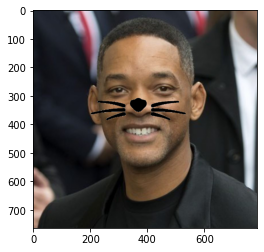

In [14]:
plt.imshow(img_rgb)
plt.show()

# Ïó¨Îü¨Î™Ö ÏûàÏùÑÎïåÎäî Í∞ôÏù¥ Ï†ÅÏö©Ïù¥ Îê†Íπå?!

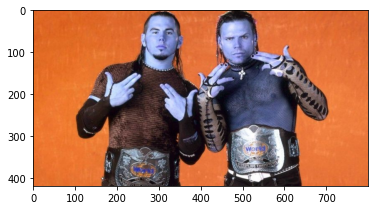

In [15]:
image_path = '/content/drive/MyDrive/aiffelcsv/wwe.jpg'
img_bgr = cv2.imread(image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()  

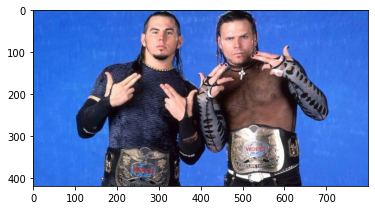

In [16]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [17]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 2)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(271, 31) (349, 109)], [(452, 48) (529, 126)]]


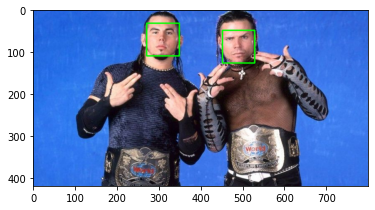

In [19]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [20]:
n_faces = len(dlib_rects)
n_faces

2

In [21]:
model_path = '/content/drive/MyDrive/aiffelcsv/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB Ïù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÏùÑ ÏûÖÎ†• Î∞õÏïÑ dlib.full_object_detection Î•º Î∞òÌôòÌï®.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detectionÏùò Î©îÏÜåÎìúÎ•º ÌÜµÌï¥ Ï¢åÌëúÎ•º Î∞õÏïÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(269, 55), (270, 64), (271, 74), (272, 83), (273, 92), (278, 100), (285, 106), (294, 111), (305, 112), (316, 112), (326, 109), (333, 104), (339, 97), (342, 88), (344, 79), (346, 69), (347, 59), (278, 49), (283, 44), (290, 43), (296, 44), (303, 47), (314, 46), (321, 44), (327, 43), (333, 45), (338, 49), (308, 52), (308, 56), (308, 60), (307, 65), (301, 73), (304, 74), (307, 74), (310, 74), (313, 74), (287, 55), (290, 53), (295, 52), (299, 55), (295, 56), (290, 56), (318, 56), (321, 53), (326, 54), (330, 56), (326, 57), (322, 57), (294, 89), (299, 84), (303, 82), (306, 83), (309, 83), (314, 86), (318, 91), (313, 93), (309, 94), (306, 94), (302, 93), (298, 92), (297, 89), (303, 87), (306, 88), (309, 88), (316, 91), (309, 87), (306, 87), (303, 86)]


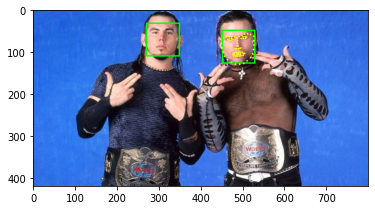

In [22]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_showÏóê landmark 68Í∞úÎ•º ÎÖ∏ÎûÄÏÉâÏ†êÏúºÎ°ú ÌëúÏãú

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [23]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (307,73)
(w,h) : (79,79)
(x,y) : (490,90)
(w,h) : (78,78)


(x,y) : (451,51)


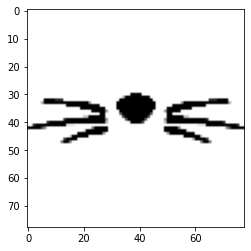

In [24]:
sticker_path = '/content/drive/MyDrive/aiffelcsv/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # ÏÇ¨ÏßÑ ÏúÑ Ïä§Ìã∞Ïª§Ïùò left-top Ï¢åÌëú

In [25]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(78, 78, 3)
(x,y) : (451,51)


(78, 78, 3)


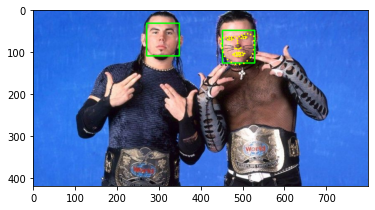

In [26]:
# img_showÎäî ÏõêÎ≥∏ ÏÇ¨ÏßÑÏùò Î≥µÏÇ¨Î≥∏Ïù¥Îã§.
# sticker_areaÎäî ÏÇ¨ÏßÑÏùò ÏùºÎ∂ÄÏù¥Îã§. Ïä§Ìã∞Ïª§Î•º Ï∂îÍ∞ÄÌï† Ï¶â, ÏñºÍµ¥Ïù¥ ÏûàÎäî Î≤îÏúÑÏóê Ìï¥ÎãπÌïúÎã§.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

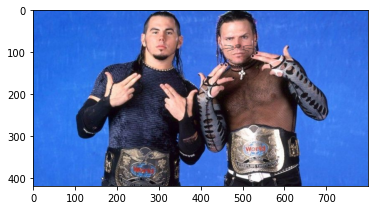

In [27]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# ÌöåÍ≥† 

Ïù¥Î≤à ÏùµÏä§Îäî ÍµâÏû•Ìûà Ïû¨Î∞åÏóàÎã§ Ïñ¥Î†§ÏõÄÏùÄ ÏóÜÏóàÏßÄÎßå 
2Í∞úÏù¥ÏÉÅÏùò ÏñºÍµ¥Ïóê Î™®Îëê ÏàòÏóºÏùÑ Î∂ôÏù¥Í≥† Ïã∂ÏóàÎäîÎç∞ 
Ïã§Î†• Î∂ÄÏ°±ÏúºÎ°ú ÌïòÏßÄ Î™ªÌïòÏòÄÎã§ 

Ïû¨Î∞åÎäî ÏùµÏä§Îßå ÏûàÏúºÎ©¥ ÏñºÎßàÎÇò Ï¢ãÏùÑÍπå ÌïòÌïòÌïòÌïò 